In [10]:
# 'https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=pnt&tg=0&date=20200930'

In [70]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
import pandas as pd

url='https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=pnt&date=20210930'
page=urlopen(url)

soup=BeautifulSoup(page,'html.parser')

In [71]:
soup.find_all('div','tit5')[0].a.string

'밥정'

In [72]:
movie_name=[i.a.string for i in soup.find_all('div','tit5')]
movie_name

['밥정',
 '그린 북',
 '가버나움',
 '디지몬 어드벤처 라스트 에볼루션 : 인연',
 '원더',
 '베일리 어게인',
 '아일라',
 '그대, 고맙소 : 김호중 생애 첫 팬미팅 무비',
 '먼 훗날 우리',
 '당갈',
 '극장판 바이올렛 에버가든',
 '포드 V 페라리',
 '주전장',
 '쇼생크 탈출',
 '터미네이터 2:오리지널',
 '나 홀로 집에',
 '덕구',
 '라이언 일병 구하기',
 '클래식',
 '월-E',
 '보헤미안 랩소디',
 '사운드 오브 뮤직',
 '빽 투 더 퓨쳐',
 '잭 스나이더의 저스티스 리그',
 '포레스트 검프',
 '위대한 쇼맨',
 '글래디에이터',
 '헬프',
 '타이타닉',
 '인생은 아름다워',
 '매트릭스',
 '살인의 추억',
 '센과 치히로의 행방불명',
 '가나의 혼인잔치: 언약',
 '토이 스토리 3',
 '헌터 킬러',
 '캐스트 어웨이',
 '집으로...',
 '반지의 제왕: 왕의 귀환',
 '히든 피겨스',
 '죽은 시인의 사회',
 '알라딘',
 '어벤져스: 엔드게임',
 '레옹',
 '쉰들러 리스트',
 '아이 캔 스피크',
 '동주',
 '안녕 베일리',
 '클레멘타인',
 '여인의 향기']

In [73]:
movie_point = [i.string for i in soup.find_all('td', 'point')]
movie_point

['9.63',
 '9.59',
 '9.59',
 '9.54',
 '9.53',
 '9.52',
 '9.51',
 '9.50',
 '9.50',
 '9.49',
 '9.49',
 '9.48',
 '9.47',
 '9.45',
 '9.44',
 '9.43',
 '9.43',
 '9.43',
 '9.43',
 '9.42',
 '9.42',
 '9.42',
 '9.41',
 '9.41',
 '9.41',
 '9.41',
 '9.41',
 '9.40',
 '9.40',
 '9.40',
 '9.40',
 '9.40',
 '9.40',
 '9.39',
 '9.39',
 '9.39',
 '9.38',
 '9.38',
 '9.38',
 '9.38',
 '9.38',
 '9.38',
 '9.38',
 '9.38',
 '9.37',
 '9.37',
 '9.37',
 '9.37',
 '9.37',
 '9.37']

In [65]:
movie = pd.DataFrame({ 'name': movie_name, 'point' : movie_point})
movie.head()

,name,point
0,밥정,9.63
1,그린 북,9.59
2,가버나움,9.59
3,디지몬 어드벤처 라스트 에볼루션 : 인연,9.54
4,원더,9.53


### 다음페이지

In [66]:
# https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=pnt&date=20210930&page=2

In [67]:
url='https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=pnt&date=20210930&page=2'
page=urlopen(url)

soup=BeautifulSoup(page,'html.parser')

movie_name=[i.a.string for i in soup.find_all('div','tit5')]
movie_point = [i.string for i in soup.find_all('td', 'point')]
movie2 = pd.DataFrame({ 'name': movie_name, 'point' : movie_point})
movie2.head()

,name,point
0,서유기 2 - 선리기연,9.36
1,아이즈 온 미 : 더 무비,9.36
2,굿 윌 헌팅,9.36
3,미스 슬로운,9.36
4,굿바이 마이 프랜드,9.36


In [68]:
movie=pd.merge(movie,movie2)
movie


,name,point


In [97]:
# 모든 페이지 별로 출력
import itertools
names=[]
point=[]
for i in range(1,41,1):
    url='https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=pnt&date=20210930&page=%d'%i
    page=urlopen(url)
    soup=BeautifulSoup(page,'html.parser')
    
    movie_name=[i.a.string for i in soup.find_all('div','tit5')]
    movie_point = [i.string for i in soup.find_all('td', 'point')]
    names.append(movie_name)
    point.append(movie_point)
names=list(itertools.chain(*names))
points=list(itertools.chain(*point))

In [98]:
movies = pd.DataFrame({ 'name': names, 'point' : points})
movies.head()

,name,point
0,밥정,9.63
1,그린 북,9.59
2,가버나움,9.59
3,디지몬 어드벤처 라스트 에볼루션 : 인연,9.54
4,원더,9.53


In [99]:
movies.shape

(2000, 2)

In [100]:
movies.tail(5)

,name,point
1995,사랑보다 아름다운 유혹,8.15
1996,귀 없는 토끼,8.15
1997,로빈슨 크루소,8.15
1998,저스트 라이크 헤븐,8.15
1999,프란시스 하,8.15


In [101]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    2000 non-null   object
 1   point   2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [103]:
movies.rename(columns={'name':'영화명'},inplace=True)
movies.head(3)

,영화명,point
0,밥정,9.63
1,그린 북,9.59
2,가버나움,9.59


In [104]:
s2021=pd.read_excel('2021통합.xlsx')
s2021.head(3)

,영화명,제작연도,제작국가,유형,장르,제작상태,감독,제작사,개봉일,매출액,매출액점유율,관객수,누적관객수,스크린수,상영횟수,대표국적,국적,등급
0,박강아름 결혼하다,2019,한국,장편,다큐멘터리,개봉,박강아름,창작집단3355 (A.3355),2021-08-19,24745710,0.000,3392,3482,32,413,한국,한국,전체관람가
1,정말 먼 곳,2020,한국,장편,드라마,개봉,박근영,봄내필름,2021-03-18,84293850,0.000,10654,11049,204,2067,한국,한국,12세이상관람가
2,싱크홀,2021,한국,장편,코미디,개봉,김지훈,(주)더타워픽쳐스,2021-08-11,21351074370,0.056,2187753,2187753,1603,121634,한국,한국,12세이상관람가


In [105]:
mp2021=pd.merge(s2021,movies)

In [106]:
mp2021.head(3)

,영화명,제작연도,제작국가,유형,장르,제작상태,감독,제작사,개봉일,매출액,매출액점유율,관객수,누적관객수,스크린수,상영횟수,대표국적,국적,등급,point
0,기적,2020,한국,장편,드라마,개봉,이장훈,(주)블러썸픽쳐스,2021-09-15,4585456660,0.012,487613,487613,1198,52130,한국,한국,12세이상관람가,9.28
1,극장판 귀멸의 칼날: 무한열차편,2020,일본,장편,애니메이션,개봉,소토자키 하루오,NaN,2021-01-27,20656041700,0.054,2151861,2151861,900,151898,일본,일본,15세이상관람가,9.28
2,코다,2021,프랑스,장편,드라마,개봉,션 헤이더,NaN,2021-08-31,520015980,0.001,55878,55878,308,5185,프랑스,프랑스,12세이상관람가,9.35


In [107]:
mp2021.shape

(20, 19)

0               박강아름 결혼하다
1                  정말 먼 곳
2                     싱크홀
3                 창극 패왕별희
4                아이들은 즐겁다
              ...        
746             O형수박가슴가정부
747        미세스 잘주리 미스 안주리
748          가슴큰친구누나들-무삭제
749      빅풋 주니어2: 패밀리가 떴다
750    레전더리 콘서트: 레너드 번스타인
Name: 영화명, Length: 751, dtype: object

In [109]:
s2020=pd.read_excel('2020통합.xlsx')
mp2020=pd.merge(s2020,movies)
mp2020.shape

(19, 20)

In [110]:
s2019=pd.read_excel('2019통합.xlsx')
mp2019=pd.merge(s2019,movies)
mp2019.shape

(60, 20)

In [111]:
s2018=pd.read_excel('2018통합.xlsx')
mp2018=pd.merge(s2018,movies)
mp2018.shape

(60, 20)

In [113]:
mp2019

,영화명,영화명(영문),제작연도,제작국가,유형,장르,제작상태,감독,제작사,개봉일,매출액,매출액점유율,관객수,누적관객수,스크린수,상영횟수,대표국적,국적,등급,point
0,100일 동안 100가지로 100퍼센트 행복찾기,100 dinge,2018,독일,장편,코미디,개봉,플로리안 데이비드 핏츠,NaN,2019-09-12,259264770,0.000,32573,32573,59,1482,독일,독일,15세이상관람가,8.89
1,아틱,ARCTIC,2017,아이슬란드,장편,드라마,개봉,조 페나,NaN,2019-03-27,74541010,0.000,9503,9503,97,980,아이슬란드,아이슬란드,12세이상관람가,8.33
2,윤희에게,Moonlit Winter,2019,한국,장편,멜로/로맨스,개봉,임대형,영화사 달리기,2019-11-14,931873501,0.000,117019,117019,317,6795,한국,한국,12세이상관람가,8.96
3,항거:유관순 이야기,A Resistance,2018,한국,장편,드라마,개봉,조민호,(주)디씨지플러스,2019-02-27,9291455101,0.005,1157949,1157949,1094,46159,한국,한국,12세이상관람가,8.65
4,두 교황,The Two Popes,2019,"미국,영국,이탈리아,아르헨티나",장편,드라마,개봉,페르난도 메이렐레스,NaN,2019-12-11,123999040,0.000,16427,16427,66,846,미국,"미국,영국,이탈리아,아르헨티나",12세이상관람가,9.32
5,언더독,Underdog,2018,한국,장편,애니메이션,개봉,"오성윤,이춘백",(주)오돌또기,2019-01-16,1494957830,0.001,195183,195565,612,10774,한국,한국,전체관람가,9.32
6,장사리 : 잊혀진 영웅들,Battle of Jangsari,2019,한국,장편,전쟁,개봉,"곽경택,김태훈",(주)태원엔터테인먼트,2019-09-25,8997921050,0.005,1140876,1140876,1090,47821,한국,한국,12세이상관람가,8.25
7,양자물리학,By Quantum Physics: A Nightlife Venture,2019,한국,장편,범죄,개봉,이성태,(주)엠씨엠씨,2019-09-25,4536436380,0.002,554939,554939,799,25296,한국,한국,15세이상관람가,8.28
8,천문: 하늘에 묻는다,Forbidden Dream,2019,한국,장편,사극,개봉,허진호,(주)하이브미디어코프,2019-12-26,7808242950,0.004,965624,965624,1198,25734,한국,한국,12세이상관람가,8.81
9,졸업,Graduation,2018,한국,장편,다큐멘터리,개봉,박주환,미디어나무,2019-11-07,11065300,0.000,1414,1567,12,146,한국,한국,12세이상관람가,8.46


In [619]:
mps=pd.concat([mp2018,mp2019,mp2020,mp2021])
mps.head()

,영화명,영화명(영문),제작연도,제작국가,유형,장르,제작상태,감독,제작사,개봉일,매출액,매출액점유율,관객수,누적관객수,스크린수,상영횟수,대표국적,국적,등급,point
0,리즈와 파랑새,Liz and the Blue Bird,2018.0,일본,장편,애니메이션,개봉,야마다 나오코,NaN,2018-10-09,174140400,0.000,21153,21153,214,2509,일본,일본,전체관람가,8.75
1,루이스,Luis and the Aliens,2018.0,독일,장편,애니메이션,개봉,"울프강 라우엔슈타인,크리스토프 라우엔슈타인",NaN,2018-09-20,729147750,0.000,93000,93000,325,3547,독일,독일,전체관람가,8.93
2,보헤미안 랩소디,Bohemian Rhapsody,2018.0,미국,장편,드라마,개봉,브라이언 싱어,NaN,2018-10-31,80010440345,0.044,9224582,9224582,1179,204537,미국,미국,12세이상관람가,9.42
3,미드나잇 선,Midnight Sun,2018.0,미국,장편,멜로/로맨스,개봉,스콧 스피어,NaN,2018-06-21,2679300500,0.001,326086,326086,472,14847,미국,미국,12세이상관람가,8.89
4,피의 연대기,For Vagina’s Sake,2017.0,한국,장편,다큐멘터리,개봉,김보람,NaN,2018-01-18,82887200,0.000,10631,10747,38,1063,한국,한국,12세이상관람가,9.08


In [620]:
mps.shape

(159, 20)

In [621]:
mps=mps.drop(['영화명(영문)'],axis=1)
mps.head()

,영화명,제작연도,제작국가,유형,장르,제작상태,감독,제작사,개봉일,매출액,매출액점유율,관객수,누적관객수,스크린수,상영횟수,대표국적,국적,등급,point
0,리즈와 파랑새,2018.0,일본,장편,애니메이션,개봉,야마다 나오코,NaN,2018-10-09,174140400,0.000,21153,21153,214,2509,일본,일본,전체관람가,8.75
1,루이스,2018.0,독일,장편,애니메이션,개봉,"울프강 라우엔슈타인,크리스토프 라우엔슈타인",NaN,2018-09-20,729147750,0.000,93000,93000,325,3547,독일,독일,전체관람가,8.93
2,보헤미안 랩소디,2018.0,미국,장편,드라마,개봉,브라이언 싱어,NaN,2018-10-31,80010440345,0.044,9224582,9224582,1179,204537,미국,미국,12세이상관람가,9.42
3,미드나잇 선,2018.0,미국,장편,멜로/로맨스,개봉,스콧 스피어,NaN,2018-06-21,2679300500,0.001,326086,326086,472,14847,미국,미국,12세이상관람가,8.89
4,피의 연대기,2017.0,한국,장편,다큐멘터리,개봉,김보람,NaN,2018-01-18,82887200,0.000,10631,10747,38,1063,한국,한국,12세이상관람가,9.08


In [622]:
mps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159 entries, 0 to 19
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   영화명     159 non-null    object        
 1   제작연도    159 non-null    float64       
 2   제작국가    159 non-null    object        
 3   유형      159 non-null    object        
 4   장르      158 non-null    object        
 5   제작상태    159 non-null    object        
 6   감독      153 non-null    object        
 7   제작사     69 non-null     object        
 8   개봉일     159 non-null    datetime64[ns]
 9   매출액     159 non-null    int64         
 10  매출액점유율  159 non-null    float64       
 11  관객수     159 non-null    int64         
 12  누적관객수   159 non-null    int64         
 13  스크린수    159 non-null    int64         
 14  상영횟수    159 non-null    int64         
 15  대표국적    159 non-null    object        
 16  국적      159 non-null    object        
 17  등급      159 non-null    object        
 18  point   159

In [623]:
mps.columns

Index(['영화명', '제작연도', '제작국가', '유형', '장르', '제작상태', '감독', '제작사', '개봉일', '매출액 ',
       '매출액점유율', '관객수 ', '누적관객수 ', '스크린수 ', '상영횟수 ', '대표국적 ', '국적 ', '등급 ',
       'point'],
      dtype='object')

In [624]:
mps=mps.drop(['제작상태','감독','제작사','국적 '],axis=1)
mps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159 entries, 0 to 19
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   영화명     159 non-null    object        
 1   제작연도    159 non-null    float64       
 2   제작국가    159 non-null    object        
 3   유형      159 non-null    object        
 4   장르      158 non-null    object        
 5   개봉일     159 non-null    datetime64[ns]
 6   매출액     159 non-null    int64         
 7   매출액점유율  159 non-null    float64       
 8   관객수     159 non-null    int64         
 9   누적관객수   159 non-null    int64         
 10  스크린수    159 non-null    int64         
 11  상영횟수    159 non-null    int64         
 12  대표국적    159 non-null    object        
 13  등급      159 non-null    object        
 14  point   159 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(5), object(7)
memory usage: 19.9+ KB


In [625]:
# 날짜를 int로 바꾸기
from datetime import date
mps['개봉일'] = mps['개봉일'].apply(lambda x: x.strftime('%Y%m%d'))

mps['개봉일'] = mps['개봉일'].astype(int)

In [626]:
mps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159 entries, 0 to 19
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   영화명     159 non-null    object 
 1   제작연도    159 non-null    float64
 2   제작국가    159 non-null    object 
 3   유형      159 non-null    object 
 4   장르      158 non-null    object 
 5   개봉일     159 non-null    int32  
 6   매출액     159 non-null    int64  
 7   매출액점유율  159 non-null    float64
 8   관객수     159 non-null    int64  
 9   누적관객수   159 non-null    int64  
 10  스크린수    159 non-null    int64  
 11  상영횟수    159 non-null    int64  
 12  대표국적    159 non-null    object 
 13  등급      159 non-null    object 
 14  point   159 non-null    object 
dtypes: float64(2), int32(1), int64(5), object(7)
memory usage: 19.3+ KB


In [627]:
# point 분류
# mps=mps.sort_values(by='point',ascending=False)
mps['point']=mps['point'].astype('float')

In [628]:
mps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159 entries, 0 to 19
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   영화명     159 non-null    object 
 1   제작연도    159 non-null    float64
 2   제작국가    159 non-null    object 
 3   유형      159 non-null    object 
 4   장르      158 non-null    object 
 5   개봉일     159 non-null    int32  
 6   매출액     159 non-null    int64  
 7   매출액점유율  159 non-null    float64
 8   관객수     159 non-null    int64  
 9   누적관객수   159 non-null    int64  
 10  스크린수    159 non-null    int64  
 11  상영횟수    159 non-null    int64  
 12  대표국적    159 non-null    object 
 13  등급      159 non-null    object 
 14  point   159 non-null    float64
dtypes: float64(3), int32(1), int64(5), object(6)
memory usage: 19.3+ KB


In [630]:
#평점을 분류하기
for i in range(len(mps)):
    if mps['point'].iloc[i]>=9:
        mps['result']=1
    else:
        mps['result']=0

In [634]:
mps.loc[mps['point']>=9.0,'result']=1
mps.loc[mps['point']<9.0,'result']=0

In [635]:
# mps=mps.set_index('영화명')
mps.head()

,제작연도,제작국가,유형,장르,개봉일,매출액,매출액점유율,관객수,누적관객수,스크린수,상영횟수,대표국적,등급,point,result
영화명,,,,,,,,,,,,,,,
리즈와 파랑새,2018.0,일본,장편,애니메이션,20181009,174140400,0.000,21153,21153,214,2509,일본,전체관람가,8.75,0
루이스,2018.0,독일,장편,애니메이션,20180920,729147750,0.000,93000,93000,325,3547,독일,전체관람가,8.93,0
보헤미안 랩소디,2018.0,미국,장편,드라마,20181031,80010440345,0.044,9224582,9224582,1179,204537,미국,12세이상관람가,9.42,1
미드나잇 선,2018.0,미국,장편,멜로/로맨스,20180621,2679300500,0.001,326086,326086,472,14847,미국,12세이상관람가,8.89,0
피의 연대기,2017.0,한국,장편,다큐멘터리,20180118,82887200,0.000,10631,10747,38,1063,한국,12세이상관람가,9.08,1


In [636]:
mps['result'].value_counts()

0    99
1    60
Name: result, dtype: int64

In [637]:
mps.shape

(159, 15)

In [638]:
mps.columns

Index(['제작연도', '제작국가', '유형', '장르', '개봉일', '매출액 ', '매출액점유율', '관객수 ', '누적관객수 ',
       '스크린수 ', '상영횟수 ', '대표국적 ', '등급 ', 'point', 'result'],
      dtype='object')

In [639]:
mps['유형'].value_counts()

장편    159
Name: 유형, dtype: int64

In [640]:
# # object 항목들을 one-hot-encoding
# mps=pd.get_dummies(data=mps,columns=['제작국가'],prefix='제작국가')
# mps=pd.get_dummies(data=mps,columns=['장르'],prefix='장르')
# mps=pd.get_dummies(data=mps,columns=['대표국적 '],prefix='대표국적 ')
# mps=pd.get_dummies(data=mps,columns=['등급 '],prefix='등급 ')

In [641]:
from sklearn.preprocessing import LabelEncoder
# 제작국가, 유형, 장르, 대표국적, 등급에 레이블 인코딩
le=LabelEncoder()
mps['제작국가']=le.fit_transform(mps['제작국가'].values)

In [642]:
mps['유형']=le.fit_transform(mps['유형'].values)

In [643]:
mps['대표국적 ']=le.fit_transform(mps['대표국적 '].values)

In [644]:
mps['등급 ']=le.fit_transform(mps['등급 '].values)

In [645]:
mps=mps.dropna(axis=0)
mps.isnull().sum()
mps['장르']=le.fit_transform(mps['장르'].values)

<ipython-input-645-8dc4703e098b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mps['장르']=le.fit_transform(mps['장르'].values)


In [646]:
mps.columns

Index(['제작연도', '제작국가', '유형', '장르', '개봉일', '매출액 ', '매출액점유율', '관객수 ', '누적관객수 ',
       '스크린수 ', '상영횟수 ', '대표국적 ', '등급 ', 'point', 'result'],
      dtype='object')

In [647]:
mps.info()

<class 'pandas.core.frame.DataFrame'>
Index: 158 entries, 리즈와 파랑새 to 소울
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   제작연도    158 non-null    float64
 1   제작국가    158 non-null    int32  
 2   유형      158 non-null    int32  
 3   장르      158 non-null    int32  
 4   개봉일     158 non-null    int32  
 5   매출액     158 non-null    int64  
 6   매출액점유율  158 non-null    float64
 7   관객수     158 non-null    int64  
 8   누적관객수   158 non-null    int64  
 9   스크린수    158 non-null    int64  
 10  상영횟수    158 non-null    int64  
 11  대표국적    158 non-null    int32  
 12  등급      158 non-null    int32  
 13  point   158 non-null    float64
 14  result  158 non-null    int64  
dtypes: float64(3), int32(6), int64(6)
memory usage: 16.0+ KB


In [648]:
mps=mps.drop(['유형'],axis=1)

In [649]:
mps['매출액']=np.log1p(mps['매출액 '])
mps=mps.drop(['매출액 '],axis=1)

In [654]:
import numpy as np
X=(mps.drop(['result','매출액','매출액점유율','point'],axis=1))
y=mps['result']

In [655]:
X.columns

Index(['제작연도', '제작국가', '장르', '개봉일', '관객수 ', '누적관객수 ', '스크린수 ', '상영횟수 ',
       '대표국적 ', '등급 '],
      dtype='object')

In [656]:
# mps 데이터로 머신러닝 수행
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [657]:
tree=DecisionTreeClassifier(random_state=0,max_depth=5)
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [658]:
pred=tree.predict(X_test)

In [659]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,pred)
print(acc)

0.5625


In [660]:
train_scores,test_scores=list(),list()

In [661]:
for i in range(1,20):
    DT1=DecisionTreeClassifier(max_depth=i)
    # 깊이를 증가시키면서 의사결정나무 모델 적합
    DT1.fit(X_train,y_train)
    
    # training dataset 정확도 평가
    train_att=DT1.predict(X_train)
    train_acc=accuracy_score(y_train,train_att)
    train_scores.append(train_acc)
    
    # test data 정확도 평가
    test_att=DT1.predict(X_test)
    test_acc=accuracy_score(y_test,test_att)
    test_scores.append(test_acc)
    
    # Train 정확도와 Test 정확도를 depth 개수에 따른 정확도 확인
    print('>%d train : %.3f, test : %.3f' % (i,train_acc,test_acc))

>1 train : 0.718, test : 0.479
>2 train : 0.745, test : 0.521
>3 train : 0.782, test : 0.500
>4 train : 0.800, test : 0.521
>5 train : 0.845, test : 0.562
>6 train : 0.918, test : 0.583
>7 train : 0.945, test : 0.542
>8 train : 0.973, test : 0.562
>9 train : 1.000, test : 0.562
>10 train : 1.000, test : 0.542
>11 train : 1.000, test : 0.583
>12 train : 1.000, test : 0.542
>13 train : 1.000, test : 0.583
>14 train : 1.000, test : 0.542
>15 train : 1.000, test : 0.542
>16 train : 1.000, test : 0.542
>17 train : 1.000, test : 0.562
>18 train : 1.000, test : 0.583
>19 train : 1.000, test : 0.542


In [662]:
!pip install pydotplus
!pip install graphviz

In [667]:
X.columns

Index(['제작연도', '제작국가', '장르', '개봉일', '관객수 ', '누적관객수 ', '스크린수 ', '상영횟수 ',
       '대표국적 ', '등급 '],
      dtype='object')

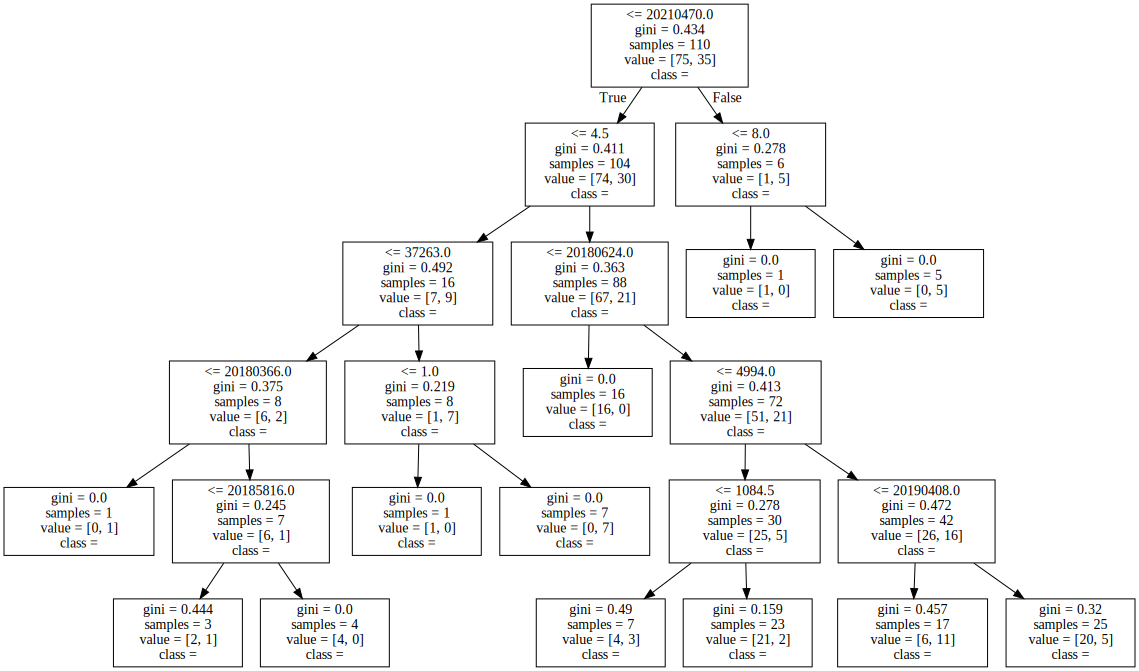

In [668]:
import graphviz
from sklearn.tree import export_graphviz

feature_name=['제작연도', '제작국가', '장르', '개봉일', '관객수 ', '누적관객수 ', '스크린수 ', '상영횟수 ',
       '대표국적 ', '등급 ']
tree=export_graphviz(tree,feature_names=feature_name,class_names=['한틱부족','완성된 영화'])
graphviz.Source(tree)

In [669]:
rf=RandomForestClassifier(random_state=200)
rf.fit(X_train,y_train)
pred2=rf.predict(X_test)
acc2=accuracy_score(y_test,pred2)

In [670]:
acc2

0.5208333333333334

In [671]:
# 회귀로
from sklearn.ensemble import RandomForestRegressor
rf2=RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=200)

In [672]:
preds=rf.predict(X_test)

In [673]:
preds

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0], dtype=int64)

In [674]:
accuracy_score(y_test,preds)

0.5208333333333334